In [1]:
import scraper_eod as s
import pandas as pd
from pandas.io.json import json_normalize
import numpy as np
import datetime
from datetime import date, timedelta
import matplotlib.pyplot as plt
import time
from scipy.stats import norm
import seaborn as sns
from yahoo_fin import options
from yahoo_fin.stock_info import *
from yahoo_fin.stock_info import get_data, get_splits
import mibian
import time
m = s.StockMongo()
import indicator_daily as i

C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)


In [3]:
o = i.Options('LAC')
o.options

C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)


date        contractName contractSize contractPeriod currency  type  \
0  2022-12-16  LAC230120C00015000      REGULAR        MONTHLY      USD  CALL   
1  2022-12-16  LAC230120C00022500      REGULAR        MONTHLY      USD  CALL   
2  2022-12-16  LAC230120C00025000      REGULAR        MONTHLY      USD  CALL   
3  2022-12-16  LAC230120C00027500      REGULAR        MONTHLY      USD  CALL   
4  2022-12-16  LAC230120C00030000      REGULAR        MONTHLY      USD  CALL   
5  2022-12-16  LAC230120C00032500      REGULAR        MONTHLY      USD  CALL   
6  2022-12-16  LAC230120C00035000      REGULAR        MONTHLY      USD  CALL   
7  2022-12-16  LAC230120P00017500      REGULAR        MONTHLY      USD   PUT   
8  2022-12-16  LAC230120P00020000      REGULAR        MONTHLY      USD   PUT   
9  2022-12-16  LAC230120P00022500      REGULAR        MONTHLY      USD   PUT   
10 2022-12-16  LAC230120P00025000      REGULAR        MONTHLY      USD   PUT   
11 2022-12-16  LAC230120P00027500      REGULAR        MONTHLY      USD   PUT   
12 2022-12-16  LAC230120P00030000      REGULAR        MONTHLY      USD   PUT   
13 2022-12-16  LAC230120P00045000      REGULAR        MONTHLY      USD   PUT   
14 2022-12-16  LAC230120P00047500      REGULAR        MONTHLY      USD   PUT   
15 2022-12-16  LAC230217C00025000      REGULAR        MONTHLY      USD  CALL   
16 2022-12-16  LAC230217C00027500      REGULAR        MONTHLY      USD  CALL   
17 2022-12-16  LAC230217C00030000      REGULAR        MONTHLY      USD  CALL   
18 2022-12-16  LAC230217C00032500      REGULAR        MONTHLY      USD  CALL   
19 2022-12-16  LAC230217C00037500      REGULAR        MONTHLY      USD  CALL   
20 2022-12-16  LAC230217C00042500      REGULAR        MONTHLY      USD  CALL   
21 2022-12-16  LAC230217P00015000      REGULAR        MONTHLY      USD   PUT   
22 2022-12-16  LAC230217P00017500      REGULAR        MONTHLY      USD   PUT   
23 2022-12-16  LAC230217P00020000      REGULAR        MONTHLY      USD   PUT   
24 2022-12-16  LAC230217P00022500      REGULAR        MONTHLY      USD   PUT   
25 2022-12-16  LAC230217P00025000      REGULAR        MONTHLY      USD   PUT   
26 2022-12-16  LAC230217P00030000      REGULAR        MONTHLY      USD   PUT   
27 2022-12-16  LAC230217P00037500      REGULAR        MONTHLY      USD   PUT   
28 2022-12-16  LAC230217P00047500      REGULAR        MONTHLY      USD   PUT   

   inTheMoney lastTradeDateTime expirationDate  strike  ...     rho  \
0        TRUE        2022-12-16     2023-01-20    15.0  ...  0.0134   
1        TRUE        2022-12-16     2023-01-20    22.5  ...  0.0107   
2       FALSE        2022-12-16     2023-01-20    25.0  ...  0.0069   
3       FALSE        2022-12-16     2023-01-20    27.5  ...  0.0037   
4       FALSE        2022-12-16     2023-01-20    30.0  ...  0.0023   
5       FALSE        2022-12-16     2023-01-20    32.5  ...  0.0014   
6       FALSE        2022-12-16     2023-01-20    35.0  ...  0.0010   
7       FALSE        2022-12-16     2023-01-20    17.5  ... -0.0026   
8       FALSE        2022-12-16     2023-01-20    20.0  ... -0.0051   
9       FALSE        2022-12-16     2023-01-20    22.5  ... -0.0093   
10       TRUE        2022-12-16     2023-01-20    25.0  ... -0.0134   
11       TRUE        2022-12-16     2023-01-20    27.5  ... -0.0141   
12       TRUE        2022-12-16     2023-01-20    30.0  ... -0.0142   
13       TRUE        2022-11-17     2023-01-20    45.0  ... -0.0177   
14       TRUE        2022-11-17     2023-01-20    47.5  ... -0.0185   
15      FALSE        2022-12-16     2023-02-17    25.0  ...  0.0141   
16      FALSE        2022-12-16     2023-02-17    27.5  ...  0.0098   
17      FALSE        2022-12-16     2023-02-17    30.0  ...  0.0065   
18      FALSE        2022-12-16     2023-02-17    32.5  ...  0.0045   
19      FALSE        2022-12-12     2023-02-17    37.5  ...  0.0021   
20      FALSE        2022-12-13     2023-02-17    42.5  ...  0.0028   
21      FALSE        2022-12-16     2023-02-17

<AxesSubplot:xlabel='rel_risk', ylabel='r'>

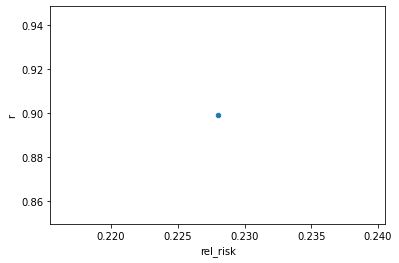

In [4]:
s = o.returns
#s[s.is_won].plot.scatter(x='probability', y='return')
#s.plot.scatter(x='rel_risk', y='return')
s[(s['rel_risk']>0)&(s['rel_risk']<3)&(s['r']>0)&(s['r']<2)].plot.scatter(x='rel_risk', y='r')
#o.strikeDates[0].volRange

In [5]:
s[(s['rel_risk']>0)&(s['rel_risk']<3)&(s['r']>0)&(s['r']<2)]

strike_date  rel_risk  high_put  low_call  highStrikePut  lowStrikeCall  \
8  2023-02-17     0.228      0.32      0.55           15.0           30.0   

   lowStrikePut  highStrikeCall      p         r ticker  
8          17.5            32.5  0.408  0.899045    LAC

In [6]:
#m = s.StockMongo()
analisys = m.stock_data.options_analisys.find()
tickers = []
for a in analisys:
    tickers.append(a['ticker'])
t = list(set(tickers))

In [21]:
symbols = m.get_symbols()
list(set([sym['sym'] for sym in symbols]))

['ULTA',
 'WYNN',
 'DVN',
 'ETSY',
 'GOOG',
 'JD',
 'NET',
 'OKTA',
 'UBER',
 'LVS',
 'EQT',
 'RTX',
 'ADSK',
 'FANG',
 'GOOGL',
 'AMBA',
 'RBLX',
 'TSLA',
 'GS',
 'ADBE',
 'BAC',
 'CAR',
 'BROS',
 'NKLA',
 'JPM',
 'DE',
 'AZO',
 'APPS',
 'CHGG',
 'HON',
 'GM',
 'LI',
 'LYFT',
 'PFE',
 'NKE',
 'INTU',
 'ENPH',
 'GOLD',
 'COF',
 'SOLO',
 'NEE',
 'PARA',
 'NEM',
 'PYPL',
 'ALB',
 'AA',
 'UNP',
 'BA',
 'LOW',
 'CPNG',
 'DAL',
 'FB',
 'BABA',
 'T',
 'Z',
 'CF',
 'COST',
 'NUE',
 'COIN',
 'PLUG',
 'BKKT',
 'AR',
 'SPY',
 'BMY',
 'UNH',
 'BE',
 'RIO',
 'NVDA',
 'AAPL',
 'TDOC',
 'AAL',
 'ALGN',
 'CLF',
 'SNAP',
 'NOW',
 'WBA',
 'TMO',
 'SCHW',
 'SBUX',
 'CVS',
 'FUBO',
 'AMAT',
 'AVGO',
 'UPST',
 'SNOW',
 'INTC',
 'ALK',
 'WMT',
 'AMR',
 'JBLU',
 'BP',
 'BNTX',
 'COP',
 'HD',
 'CCJ',
 'M',
 'CROX',
 'ROKU',
 'AMZN',
 'UAL',
 'BIDU',
 'ORCL',
 'CPRI',
 'SHOP',
 'TMUS',
 'LAC',
 'CHTR',
 'FDX',
 'KSS',
 'GME',
 'LUV',
 'SOFI',
 'ASAN',
 'DHR',
 'AFRM',
 'AI',
 'ADM',
 'DKS',
 'FCX',
 'BHC',
 '

In [8]:
print("running data aggregation")
returns = []
for tick in t:
    try:
        o = i.Options(tick)
        s = o.returns
        s = s[(s['rel_risk']>0)&(s['rel_risk']<3)&(s['r']>0)&(s['r']<2)].copy()
        returns.append(s)
    except:
        print(tick)

running data aggregation


C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: invalid value encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_to_strike']*self.days_to_strike + f['sqr_rel_risk']*np.log(self.risk_rel)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x

C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: invalid value encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_to_strike']*self.days_to_strike + f['sqr_rel_risk']*np.log(self.risk_rel)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x

C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yah

C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yah

C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yah

C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: divide by zero encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_to_strike']*self.days_to_strike + f['sqr_rel_risk']*np.log(self.risk_rel)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_

TWTR


C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yah

C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)


NKE


C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: divide by zero encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_to_strike']*self.days_to_strike + f['sqr_rel_risk']*np.log(self.risk_rel)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: invalid value encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_t

ISRG


C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: divide by zero encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_to_strike']*self.days_to_strike + f['sqr_rel_risk']*np.log(self.risk_rel)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: divide by zero encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_to_strike']*self.days_to_strike + f['sqr_rel_risk']*np.log(self.risk_rel)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is d

C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: invalid value encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_to_strike']*self.days_to_strike + f['sqr_rel_risk']*np.log(self.risk_rel)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: invalid value encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_to_strike']*self.days_to_strike + f['sqr_rel_risk']*np.log(self.risk_rel)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is dis

C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yah

C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yah

C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yah

C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: divide by zero encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_to_strike']*self.days_to_strike + f['sqr_rel_risk']*np.log(self.risk_rel)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_

C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yah

C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: divide by zero encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_to_strike']*self.days_to_strike + f['sqr_rel_risk']*np.log(self.risk_rel)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: divide by zero encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_

NKE


C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yah

C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: divide by zero encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_to_strike']*self.days_to_strike + f['sqr_rel_risk']*np.log(self.risk_rel)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_

C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yah

C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: invalid value encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_to_strike']*self.days_to_strike + f['sqr_rel_risk']*np.log(self.risk_rel)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x

C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: invalid value encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_to_strike']*self.days_to_strike + f['sqr_rel_risk']*np.log(self.risk_rel)
C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: divide by zero encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_to_strike']*self.days_to_strike + f['sqr_rel_risk']*np.log(self.risk_rel)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: invalid value encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5

C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: divide by zero encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_to_strike']*self.days_to_strike + f['sqr_rel_risk']*np.log(self.risk_rel)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_

C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: divide by zero encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_to_strike']*self.days_to_strike + f['sqr_rel_risk']*np.log(self.risk_rel)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_

TWTR


C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: invalid value encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_to_strike']*self.days_to_strike + f['sqr_rel_risk']*

C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: divide by zero encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_to_strike']*self.days_to_strike + f['sqr_rel_risk']*np.log(self.risk_rel)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_

ISRG


C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: divide by zero encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_to_strike']*self.days_to_strike + f['sqr_rel_risk']*np.log(self.risk_rel)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: divide by zero encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_to_strike']*self.days_to_strike + f['sqr_rel_risk']*np.log(self.risk_rel)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is d

C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: invalid value encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_to_strike']*self.days_to_strike + f['sqr_rel_risk']*np.log(self.risk_rel)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: invalid value encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_to_strike']*self.days_to_strike + f['sqr_rel_risk']*np.log(self.risk_rel)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is dis

C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yah

TWTR


C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yah

C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: invalid value encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_to_strike']*self.days_to_strike + f['sqr_rel_risk']*np.log(self.risk_rel)
C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: divide by zero encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_to_strike']*self.days_to_strike + f['sqr_rel_risk']*np.log(self.risk_rel)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: divide by zero encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.

C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: invalid value encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_to_strike']*self.days_to_strike + f['sqr_rel_risk']*np.log(self.risk_rel)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x

TWTR


C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yah

C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: invalid value encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_to_strike']*self.days_to_strike + f['sqr_rel_risk']*np.log(self.risk_rel)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x

NKE


C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: divide by zero encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_to_strike']*self.days_to_strike + f['sqr_rel_risk']*np.log(self.risk_rel)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_

C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yah

C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: divide by zero encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_to_strike']*self.days_to_strike + f['sqr_rel_risk']*np.log(self.risk_rel)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: divide by zero encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_to_strike']*self.days_to_strike + f['sqr_rel_risk']*np.log(self.risk_rel)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is d

TWTR


C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yah

C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yah

C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yah

NKE


C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: divide by zero encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_to_strike']*self.days_to_strike + f['sqr_rel_risk']*np.log(self.risk_rel)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_

C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)


ISRG


C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: invalid value encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_to_strike']*self.days_to_strike + f['sqr_rel_risk']*np.log(self.risk_rel)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)
C:\Users\ander\Documents\yahooScraper\indicator_daily.py:289: RuntimeWarning: divide by zero encountered in log
  r = f['y0'] + f['probability']*0.68 * self.vol_factor/0.5 + f['iv']*self.iv + f['vix']*self.vix + f['days_to_strike']*self.days_to_strike + f['sqr_rel_risk']*np.log(self.risk_rel)
C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is di

In [9]:
b = pd.concat(returns)

In [10]:
b.sort_values(by=['r'])

strike_date  rel_risk  high_put  low_call  highStrikePut  lowStrikeCall  \
5   2023-01-20  0.007000      0.07      0.35           75.0          300.0   
5   2023-01-20  0.007000      0.07      0.35           75.0          300.0   
7   2023-01-20  0.004000      0.03      0.04           52.5           90.0   
7   2023-01-20  0.004000      0.03      0.04           52.5           90.0   
7   2023-01-20  0.004000      0.03      0.04           52.5           90.0   
..         ...       ...       ...       ...            ...            ...   
0   2023-01-20  0.026667      0.03      0.12           21.0           38.0   
0   2023-01-20  0.026667      0.03      0.12           21.0           38.0   
16  2023-02-17  0.120000      3.12      2.35          190.0          230.0   
16  2023-02-17  0.120000      3.12      2.35          190.0          230.0   
16  2023-02-17  0.120000      3.12      2.35          190.0          230.0   

    lowStrikePut  highStrikeCall      p         r ticker  
5           95.0           310.0  1.088  0.018514   MRNA  
5           95.0           310.0  1.088  0.018514   MRNA  
7           52.5            95.0  1.360  0.030701    BMY  
7           52.5            95.0  1.360  0.030701    BMY  
7           52.5            95.0  1.360  0.030701    BMY  
..           ...             ...    ...       ...    ...  
0           24.0            40.0  0.408  1.921881     BP  
0           24.0            40.0  0.408  1.921881     BP  
16         190.0           245.0  0.408  1.933644    UNP  
16         190.0           245.0  0.408  1.933644    UNP  
16         190.0           245.0  0.408  1.933644    UNP  

[4071 rows x 11 columns]

In [11]:
c = b[(b['rel_risk']>0.25)&(b['p']>0.5)].copy()

In [12]:
c.sort_values(by=['r'])

strike_date  rel_risk  high_put  low_call  highStrikePut  lowStrikeCall  \
4   2023-01-20  2.252500      0.20     45.25          34.40         125.00   
4   2023-01-20  2.252500      0.20     45.25          34.40         125.00   
4   2023-01-20  2.252500      0.20     45.25          34.40         125.00   
4   2023-01-20  2.252500      0.20     45.25          34.40         125.00   
4   2023-01-20  2.252500      0.20     45.25          34.40         125.00   
17  2023-02-17  0.256000      0.74      1.08          47.50          75.00   
17  2023-02-17  0.256000      0.74      1.08          47.50          75.00   
17  2023-02-17  0.256000      0.59      0.85          40.00          62.50   
17  2023-02-17  0.256000      0.59      0.85          40.00          62.50   
1   2023-01-20  0.320000      0.24      0.42          28.00          34.00   
1   2023-01-20  0.320000      0.24      0.42          28.00          34.00   
1   2023-01-20  0.320000      0.24      0.42          28.00          34.00   
1   2023-01-20  0.320000      0.24      0.42          28.00          34.00   
1   2023-01-20  0.320000      0.24      0.42          28.00          34.00   
1   2023-01-20  0.320000      0.24      0.42          28.00          34.00   
17  2023-02-17  0.254000      4.28      5.99         215.00         365.00   
17  2023-02-17  0.254000      4.28      5.99         215.00         365.00   
17  2023-02-17  0.254000      4.28      5.99         215.00         365.00   
3   2023-01-20  0.344000      0.17      0.57          12.50          17.50   
3   2023-01-20  0.344000      0.17      0.57          12.50          17.50   
3   2023-01-20  0.344000      0.17      0.57          12.50          17.50   
3   2023-01-20  0.344000      0.17      0.57          12.50          17.50   
3   2023-01-20  0.344000      0.17      0.57          12.50          17.50   
4   2023-01-20  0.680000      4.80     12.80          87.65         165.35   
4   2023-01-20  0.680000      4.80     12.80          87.65         165.35   
4   2023-01-20  0.680000      4.80     12.80          87.65         165.35   
5   2023-01-20  0.682000      4.80     11.31          87.65         167.70   
5   2023-01-20  0.682000      4.80     11.31          87.65         167.70   
5   2023-01-20  0.682000      4.80     11.31          87.65         167.70   
7   2023-01-20  0.600000      4.80      7.30          87.65         177.70   
7   2023-01-20  0.600000      4.80      7.30          87.65         177.70   
7   2023-01-20  0.600000      4.80      7.30          87.65         177.70   
6   2023-01-20  0.520000      4.80      8.90          87.65         172.70   
6   2023-01-20  0.520000      4.80      8.90          87.65         172.70   
6   2023-01-20  0.520000      4.80      8.90          87.65         172.70   
2   2023-01-20  0.298000      4.80      1.02          87.65         155.00   
2   2023-01-20  0.298000      4.80      1.02          87.65         155.00   
2   2023-01-20  0.298000      4.80      1.02          87.65         155.00   
2   2023-01-20  0.344000      0.17      0.57          12.50          17.50   
2   2023-01-20  0.344000      0.17      0.57          12.50          17.50   
2   2023-01-20  0.344000      0.17      0.57          12.50          17.50   
2   2023-01-20  0.344000      0.17      0.57          12.50          17.50   
2   2023-01-20  0.344000      0.17      0.57          12.50          17.50   
2   2023-01-20  2.882979      1.43     14.00          49.72          85.00   
2   2023-01-20  2.882979      1.43     14.00          49.72          85.00   
3   2023-01-20  1.431412      0.15      7.30          51.60          86.57   
3   2023-01-20  1.431412      0.15      7.30          51.60          86.57   
17  2023-02-17  0.260000      1.77      3.05         120.00         205.00   
17  2023-02-17  0.260000      1.77      3.05         120.00         205.00   
17  2023-02-17  0.260000      1.77      3.05         120.00         205.00   
1   2023-01-20  0.344000 

In [17]:
t = list(set(tickers))

In [19]:
t

['ULTA',
 'WYNN',
 'DVN',
 'ETSY',
 'GOOG',
 'JD',
 'NET',
 'OKTA',
 'UBER',
 'LVS',
 'EQT',
 'RTX',
 'ADSK',
 'FANG',
 'AMBA',
 'RBLX',
 'ADBE',
 'GS',
 'BAC',
 'CAR',
 'BROS',
 'CHGG',
 'LI',
 'NKLA',
 'PFE',
 'APPS',
 'AZO',
 'HON',
 'GM',
 'LYFT',
 'DE',
 'GOLD',
 'NKE',
 'ENPH',
 'INTU',
 'PG',
 'COF',
 'SOLO',
 'NEE',
 'PARA',
 'NEM',
 'PYPL',
 'ALB',
 'AA',
 'UNP',
 'DAL',
 'LOW',
 'CPNG',
 'BA',
 'BABA',
 'T',
 'Z',
 'CF',
 'NUE',
 'COST',
 'PLUG',
 'BKKT',
 'AR',
 'UNH',
 'BMY',
 'BE',
 'RIO',
 'TDOC',
 'AAPL',
 'NVDA',
 'AAL',
 'ALGN',
 'CLF',
 'SNAP',
 'WBA',
 'NOW',
 'TMO',
 'SCHW',
 'SBUX',
 'CVS',
 'FUBO',
 'AMAT',
 'UPST',
 'AVGO',
 'SNOW',
 'INTC',
 'ALK',
 'WMT',
 'JBLU',
 'AMR',
 'BP',
 'BNTX',
 'HD',
 'ROKU',
 'CCJ',
 'M',
 'CROX',
 'COP',
 'UAL',
 'BIDU',
 'ORCL',
 'CPRI',
 'SHOP',
 'TMUS',
 'LAC',
 'CHTR',
 'FDX',
 'KSS',
 'GME',
 'LUV',
 'SOFI',
 'ASAN',
 'AFRM',
 'DHR',
 'AI',
 'ADM',
 'DKS',
 'FCX',
 'BHC',
 'TSM',
 'TWLO',
 'IBM',
 'AXP',
 'TLRY',
 'CVNA',
 'LR

In [2]:
t = i.TickerAggregation()

C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)


NKE
TWTR
ISRG
FANG
BKNG
SNOW
BA


In [3]:
t.tickers

['F',
 'NKLA',
 'QS',
 'HD',
 'ZS',
 'PEP',
 'LRCX',
 'CF',
 'MVIS',
 'PG',
 'DKNG',
 'CHTR',
 'SNAP',
 'AEO',
 'TWTR',
 'ADSK',
 'ALK',
 'JD',
 'SQ',
 'ALB',
 'WYNN',
 'BLNK',
 'AVGO',
 'INTC',
 'NCLH',
 'XOM',
 'MRNA',
 'CHWY',
 'APPS',
 'MU',
 'AMBA',
 'EOG',
 'PARA',
 'ALGN',
 'LULU',
 'SE',
 'CLX',
 'CCL',
 'TSLA',
 'SNOW',
 'AEM',
 'GOOG',
 'AXON',
 'ZIM',
 'AMC',
 'APA',
 'ENPH',
 'PLTR',
 'PYPL',
 'BA',
 'CROX',
 'DOCS',
 'CPNG',
 'CAR',
 'UNH',
 'RIOT',
 'DWAC',
 'NIO',
 'AMT',
 'UNP',
 'BYND',
 'GM',
 'CRM',
 'BROS',
 'LCID',
 'BTU',
 'LLY',
 'CM',
 'CMG',
 'IBM',
 'ISRG',
 'AI',
 'DLTR',
 'MRVL',
 'NEM',
 'ABNB',
 'BILI',
 'ROKU',
 'UAL',
 'BKKT',
 'ACN',
 'AFRM',
 'HON',
 'ABC',
 'CPRI',
 'CVX',
 'T',
 'COST',
 'AR',
 'BIDU',
 'HOOD',
 'SPLK',
 'BHC',
 'TGT',
 'ASAN',
 'ABT',
 'KSS',
 'DE',
 'PLUG',
 'COUP',
 'BBIG',
 'BNTX',
 'FUBO',
 'MRO',
 'VZ',
 'HAL',
 'AMAT',
 'CRWD',
 'GS',
 'SHOP',
 'MOS',
 'CCJ',
 'SCHW',
 'LI',
 'ZM',
 'CC',
 'X',
 'BAND',
 'GOOGL',
 'ADM',
 'DHR

In [5]:
a

strike_date  rel_risk  high_put_value  low_call_value  high_call_value  \
4   2023-01-20  2.252500            0.20           45.25             0.05   
17  2023-02-17  0.256000            0.74            1.08             0.98   
17  2023-02-17  0.256000            0.59            0.85             0.93   
1   2023-01-20  0.320000            0.24            0.42             0.38   
17  2023-02-17  0.254000            4.28            5.99             5.11   
3   2023-01-20  0.344000            0.17            0.57             0.60   
4   2023-01-20  0.680000            4.80           12.80             5.80   
5   2023-01-20  0.682000            4.80           11.31             5.80   
7   2023-01-20  0.600000            4.80            7.30             5.80   
6   2023-01-20  0.520000            4.80            8.90             5.80   
2   2023-01-20  0.298000            4.80            1.02             5.80   
2   2023-01-20  0.344000            0.17            0.57             0.60   
2   2023-01-20  2.882979            1.43           14.00             0.15   
3   2023-01-20  1.431412            0.15            7.30             0.15   
17  2023-02-17  0.260000            1.77            3.05             2.38   
1   2023-01-20  0.344000            0.17            0.57             0.60   

    low_put_value  highStrikePut  lowStrikeCall  lowStrikePut  highStrikeCall  \
4            0.05          34.40         125.00         54.40          134.40   
17           0.68          47.50          75.00         50.00           77.50   
17           0.55          40.00          62.50         42.50           65.00   
1            0.24          28.00          34.00         29.00           35.00   
17           5.55         215.00         365.00        220.00          370.00   
3            0.14          12.50          17.50         15.00           20.00   
4           10.40          87.65         165.35         92.65          170.35   
5            8.90          87.65         167.70         92.65          172.70   
7            5.30          87.65         177.70         92.65          182.70   
6            7.30          87.65         172.70         92.65          177.70   
2            0.53          87.65         155.00         92.65          160.00   
2            0.14          12.50          17.50         15.00           20.00   
2            7.30          49.72          85.00         51.60           86.57   
3            0.10          51.60          86.57         51.60           91.60   
17           2.36         120.00         205.00        125.00          210.00   
1            0.14          12.50          17.50         15.00           20.00   

        p         r  high_put  low_call ticker  
4   0.952  0.038991       NaN       NaN    COF  
17  0.544  0.254279       NaN       NaN    OXY  
17  0.544  0.413789       NaN       NaN     MU  
1   0.544  0.493085       NaN       NaN    BAC  
17  0.544  0.679758       NaN       NaN   NFLX  
3   0.816  0.699984       NaN       NaN   CPNG  
4   0.952  0.728604       NaN       NaN   FANG  
5   1.088  0.736305       NaN       NaN   FANG  
7   1.360  0.760047       NaN       NaN   FANG  
6   1.224  0.761074       NaN       NaN   FANG  
2   0.680  0.764207       NaN       NaN   FANG  
2   0.680  0.833343       NaN       NaN   CPNG  
2   0.680  0.867811       NaN       NaN    RIO  
3   0.816  0.890849       NaN       NaN    RIO  
17  0.544  0.910115       NaN       NaN   NVDA  
1   0.544  0.966701       NaN       NaN   CPNG

In [7]:
now = datetime.datetime.now()
now = datetime.datetime.strptime(now.strftime("%m/%d/%Y"),"%m/%d/%Y")

In [8]:
a['date'] = now

In [10]:
a['value'] = a.low_put_value -a.high_put_value + a.low_call_value - a.high_put_value

In [69]:
b = a[(a['value']>0)&(a['rel_risk']<1)&(a['rel_risk']>0.3)]

In [70]:
c = b.sort_values(by=['rel_risk', 'p', 'r'], ascending=False)

In [71]:
c = c.drop(['low_call', 'high_put'], axis=1)

In [72]:
tickers = []

In [66]:
def get_trade(row):
    if row['ticker'] not in tickers:
        tickers.append(row['ticker'])
        m.update_portfolio(row.to_dict())
    else:
        print("sf")
        print(row['ticker'])

In [67]:
for index, row in c.iterrows():
    if len(tickers) > 3:
        break
    get_trade(row)

sf
FANG
sf
FANG
sf
FANG


In [92]:
c

strike_date  rel_risk  high_put_value  low_call_value  high_call_value  \
5  2023-01-20     0.682            4.80           11.31             5.80   
4  2023-01-20     0.680            4.80           12.80             5.80   
7  2023-01-20     0.600            4.80            7.30             5.80   
6  2023-01-20     0.520            4.80            8.90             5.80   
3  2023-01-20     0.344            0.17            0.57             0.60   
2  2023-01-20     0.344            0.17            0.57             0.60   
1  2023-01-20     0.344            0.17            0.57             0.60   
1  2023-01-20     0.320            0.24            0.42             0.38   

   low_put_value  highStrikePut  lowStrikeCall  lowStrikePut  highStrikeCall  \
5           8.90          87.65         167.70         92.65          172.70   
4          10.40          87.65         165.35         92.65          170.35   
7           5.30          87.65         177.70         92.65          182.70   
6           7.30          87.65         172.70         92.65          177.70   
3           0.14          12.50          17.50         15.00           20.00   
2           0.14          12.50          17.50         15.00           20.00   
1           0.14          12.50          17.50         15.00           20.00   
1           0.24          28.00          34.00         29.00           35.00   

       p         r ticker       date  value  
5  1.088  0.736305   FANG 2022-12-18  10.61  
4  0.952  0.728604   FANG 2022-12-18  13.60  
7  1.360  0.760047   FANG 2022-12-18   3.00  
6  1.224  0.761074   FANG 2022-12-18   6.60  
3  0.816  0.699984   CPNG 2022-12-18   0.37  
2  0.680  0.833343   CPNG 2022-12-18   0.37  
1  0.544  0.966701   CPNG 2022-12-18   0.37  
1  0.544  0.493085    BAC 2022-12-18   0.18

In [74]:
d = m.get_portfolio()

In [75]:
d.count()

C:\Users\ander\AppData\Local\Temp/ipykernel_76088/1918412174.py:1: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  d.count()


1

In [78]:
d[0]

{'_id': ObjectId('639f708269e4a4ed0522395f'),
 'strike_date': datetime.datetime(2023, 1, 20, 0, 0),
 'rel_risk': 0.682,
 'high_put_value': 4.8,
 'low_call_value': 11.31,
 'high_call_value': 5.8,
 'low_put_value': 8.9,
 'highStrikePut': 87.65,
 'lowStrikeCall': 167.7,
 'lowStrikePut': 92.65,
 'highStrikeCall': 172.7,
 'p': 1.088,
 'r': 0.7363046334324687,
 'ticker': 'FANG',
 'date': datetime.datetime(2022, 12, 18, 0, 0),
 'value': 10.61}

In [85]:
del e["_id"]

In [82]:
e = d[0]

In [86]:
e.keys()

dict_keys(['strike_date', 'rel_risk', 'high_put_value', 'low_call_value', 'high_call_value', 'low_put_value', 'highStrikePut', 'lowStrikeCall', 'lowStrikePut', 'highStrikeCall', 'p', 'r', 'ticker', 'date', 'value'])

In [91]:
e

{'strike_date': datetime.datetime(2023, 1, 20, 0, 0),
 'rel_risk': 0.682,
 'high_put_value': 4.8,
 'low_call_value': 11.31,
 'high_call_value': 5.8,
 'low_put_value': 8.9,
 'highStrikePut': 87.65,
 'lowStrikeCall': 167.7,
 'lowStrikePut': 92.65,
 'highStrikeCall': 172.7,
 'p': 1.088,
 'r': 0.7363046334324687,
 'ticker': 'FANG',
 'date': datetime.datetime(2022, 12, 18, 0, 0),
 'value': 10.61}

In [ ]:
c[c['highStrikePut'] == ]